# Environment setup

## Get the notebook

Clone the git repository

`git clone https://github.com/ftorradeflot/PythonMasterIFAE.git`


Steps to launch this notebook, if you don't have a running environment yet, but you already have conda.

```
cd PythonMasterIFAE
conda env create -f environment.yml -n python_bootcamp_22
conda activate python_bootcamp_22
python -m ipykernel install --user --name=python_bootcamp_22
jupyter lab # launch jupyter notebook
```

## Retrieve test data

In [64]:
import os
import zipfile


DATA_URL = 'https://public.pic.es/s/tOiGhyapptjxZxE/download'
RESOURCE_FOLDER = os.path.join(os.getcwd(), '..', 'resources', 'pandas')
#RESOURCE_FOLDER = 'C:\\user\\torradeflot\\Downloads'
os.makedirs(RESOURCE_FOLDER, exist_ok=True)
PANDAS_ZIP_FILE = os.path.join(RESOURCE_FOLDER, 'pandas.zip')
print(RESOURCE_FOLDER)

/nfs/pic.es/user/t/torradeflot/PythonMasterIFAE/pandas/../resources/pandas


In [2]:
!wget $DATA_URL -O $PANDAS_ZIP_FILE

--2022-10-10 08:48:28--  https://public.pic.es/s/tOiGhyapptjxZxE/download
Resolving public.pic.es (public.pic.es)... 193.109.175.227
Connecting to public.pic.es (public.pic.es)|193.109.175.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62172663 (59M) [application/zip]
Saving to: ‘/nfs/pic.es/user/t/torradeflot/PythonMasterIFAE/resources/pandas/pandas.zip’

100%[======================================>] 62,172,663  75.0MB/s   in 0.8s   

2022-10-10 08:48:29 (75.0 MB/s) - ‘/nfs/pic.es/user/t/torradeflot/PythonMasterIFAE/resources/pandas/pandas.zip’ saved [62172663/62172663]



In [3]:
with zipfile.ZipFile(PANDAS_ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall(RESOURCE_FOLDER)

In [93]:
def resource(filename):
    return os.path.join(RESOURCE_FOLDER, filename)

## Load extensions and modules

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Introduction

<p style="font-size:24px">Official master's degree in High Energy Physics, Astrophysics and Cosmology</p>

<img width=400 src="https://raw.githubusercontent.com/pandas-dev/pandas/4a31802c42b3c1acab7dd47f59035e50510735d9/web/pandas/static/img/pandas.svg" alt="Pandas"/>

<p style="font-size:18px">The idea of this notebook is to show the power of working with pandas dataframes</p>

## Credits

This notebook was written by Jorge Carretero

<img width="50%" src="https://www.pic.es/wp-content/uploads/2019/01/jorge.jpg"/>

with contributions from Pau Tallada and Nadia Tonello.


## Motivation

We usually work with tabular data

We "should not handle them" with bash commands like: for, split, grep, awk, etc...
(but sometimes it is very useful to use both approches!)

And **pandas is a very nice tool** to handle this kind of data.

**Welcome to Pandas!**

## Definition of pandas

New defition:

"pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."

Previous definition?:

"Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive."

------------------------

It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. 

Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language.

More information about pandas: <http://pandas.pydata.org/pandas-docs/stable/>

## Some useful information

- Ten minutes to pandas:

<https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html>

- Pandas cookbook:

<https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html>

- Nice pandas course:

<https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python#gs.=B6Dr74>

- Multidimensional dataframes, xarray: 

<http://xarray.pydata.org/en/stable/>

- Tips & Tricks

<https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/>

# Pandas

<a id=know></a>
## Know your data

Very important to (perfectly) know your data: structure, data type, index, relation, etc.

### Dimensionality:
    - 1-D: Series; e.g.
        - Solar planets: [Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune]
        - Set of astronomical objects and when they were observed:
            [[NGC1952, 2012-05-01],
             [NGC224, 2013-01-23],
             [NGC5194, 2014-02-13]]
    - 2-D: DataFrame; e.g (more business oriented):
        - 3 months of sales information for 3 fictitious companies:
            sales = [{'account': 'Jones LLC', 'Jan': 150, 'Feb': 200, 'Mar': 140},
                     {'account': 'Alpha Co',  'Jan': 200, 'Feb': 210, 'Mar': 215},
                     {'account': 'Blue Inc',  'Jan': 50,  'Feb': 90,  'Mar': 95 }]

### Index
- It is the value (~key) we use as a reference for each element. (Note: It does not have to be unique)

- Most of the data contain at least one index

## Definition

### Series
Series is a one-dimensional labeled array capable of holding any data type

The axis labels are collectively referred to as the index

This is the basic idea of how to create a Series dataframe:

**s = pd.Series(data, index=index)**

where data can be:
- list
- ndarray
- python dictionary
- scalar
and index is a list of axis labels

#### Create a Series array from a list
If no index is passed, one will be created having values [0, ..., len(data) - 1]

In [2]:
solar_planets = [
    'Mercury',
    'Venus',
    'Earth','Mars','Jupiter','Saturn','Uranus','Neptune']

In [6]:
splanets = pd.Series(solar_planets)

In [7]:
splanets

0    Mercury
1      Venus
2      Earth
3       Mars
4    Jupiter
5     Saturn
6     Uranus
7    Neptune
dtype: object

In [ ]:
# Tips and tricks
# To access the Docstring for quick reference on syntax use ? before:
pd.Series

In [9]:
splanets

0    Mercury
1      Venus
2      Earth
3       Mars
4    Jupiter
5     Saturn
6     Uranus
7    Neptune
dtype: object

In [9]:
splanets.index

RangeIndex(start=0, stop=8, step=1)

#### Create a Series array from a numpy array
If data is an ndarray, index must be the same length as data. 
If no index is passed, one will be created having values [0, ..., len(data) - 1]

- Not including index:

In [10]:
np.random.randn(5)

array([ 1.16326855, -0.7953137 , -1.17356068, -0.49001548, -2.0200424 ])

In [11]:
s1 = pd.Series(np.random.randn(5))

In [12]:
s1

0    1.061291
1    2.250918
2   -0.040887
3    1.365959
4    0.520548
dtype: float64

In [13]:
s1.index

RangeIndex(start=0, stop=5, step=1)

- Including index

In [14]:
s2 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [15]:
s2

a    1.224681
b   -1.173335
c   -0.546111
d   -0.447260
e   -0.198283
dtype: float64

In [16]:
s2.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

- From scalar value

If data is a scalar value, an index must be provided

The value will be repeated to match the length of index

In [17]:
s3 = pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

In [18]:
s3

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [19]:
s3.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

#### Create a Series array from a python dictionary

In [20]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}

In [21]:
sd = pd.Series(d)

In [22]:
sd

a    0.0
b    1.0
c    2.0
dtype: float64

### DataFrame

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

You can think of it **like a spreadsheet or SQL table, or a dict of Series objects**. 

It is generally the most commonly used pandas object. 

Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

#### From a list of dictionaries

In [23]:
sales = [{'account': 'Jones LLC', 'Jan': 150, 'Feb': 200, 'Mar': 140},
                 {'account': 'Alpha Co',  'Jan': 200, 'Feb': 210, 'Mar': 215},
                 {'account': 'Blue Inc',  'Jan': 50,  'Feb': 90,  'Mar': 95 }]

In [24]:
sales

[{'account': 'Jones LLC', 'Jan': 150, 'Feb': 200, 'Mar': 140},
 {'account': 'Alpha Co', 'Jan': 200, 'Feb': 210, 'Mar': 215},
 {'account': 'Blue Inc', 'Jan': 50, 'Feb': 90, 'Mar': 95}]

In [25]:
df = pd.DataFrame(sales)

In [26]:
df

,account,Jan,Feb,Mar
0,Jones LLC,150,200,140
1,Alpha Co,200,210,215
2,Blue Inc,50,90,95


Notice that the dataframe was pretty printed. The dataframes can be exported to different formats

In [27]:
json_df = df.to_json()
md_df = df.to_markdown()
csv_df = df.to_csv()
html_df = df.to_html()
print('\n'.join(['JSON', json_df,
                 'Markdown', md_df,
                 'CSV', csv_df,
                 'HTML', html_df]))

JSON
{"account":{"0":"Jones LLC","1":"Alpha Co","2":"Blue Inc"},"Jan":{"0":150,"1":200,"2":50},"Feb":{"0":200,"1":210,"2":90},"Mar":{"0":140,"1":215,"2":95}}
Markdown
|    | account   |   Jan |   Feb |   Mar |
|---:|:----------|------:|------:|------:|
|  0 | Jones LLC |   150 |   200 |   140 |
|  1 | Alpha Co  |   200 |   210 |   215 |
|  2 | Blue Inc  |    50 |    90 |    95 |
CSV
,account,Jan,Feb,Mar
0,Jones LLC,150,200,140
1,Alpha Co,200,210,215
2,Blue Inc,50,90,95

HTML
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>account</th>
      <th>Jan</th>
      <th>Feb</th>
      <th>Mar</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Jones LLC</td>
      <td>150</td>
      <td>200</td>
      <td>140</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Alpha Co</td>
      <td>200</td>
      <td>210</td>
      <td>215</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Blue Inc</td>
      <td>50</td>
      <

In [28]:
from IPython.display import Markdown, HTML

In [39]:
display(Markdown(md_df))

|    | account   |   Jan |   Feb |   Mar |
|---:|:----------|------:|------:|------:|
|  0 | Jones LLC |   150 |   200 |   140 |
|  1 | Alpha Co  |   200 |   210 |   215 |
|  2 | Blue Inc  |    50 |    90 |    95 |

In [29]:
display(HTML(html_df))

,account,Jan,Feb,Mar
0,Jones LLC,150,200,140
1,Alpha Co,200,210,215
2,Blue Inc,50,90,95


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   account  3 non-null      object
 1   Jan      3 non-null      int64 
 2   Feb      3 non-null      int64 
 3   Mar      3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes


In [31]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [32]:
df = df.set_index('account')

In [33]:
df

,Jan,Feb,Mar
account,,,
Jones LLC,150,200,140
Alpha Co,200,210,215
Blue Inc,50,90,95


#### From dict of Series or dicts

In [34]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [35]:
df = pd.DataFrame(d)

In [36]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     3 non-null      float64
 1   two     4 non-null      float64
dtypes: float64(2)
memory usage: 96.0+ bytes


In [39]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [40]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [44]:
for c in df.columns:
    print(c)

one
two


In [45]:
df.ad

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex_

#### From dict of ndarrays / lists
The ndarrays must all be the same length. 

If an index is passed, it must clearly also be the same length as the arrays. 

If no index is passed, the result will be range(n), where n is the array length.

In [76]:
d = {'one' : [1., 2., 3., 4.], 'two' : [4., 3., 2., 1.]}

In [77]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [78]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


#### From structured or record array
The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. 

If no index is passed, the result will be range(n), where n is the array length.

In [46]:
data = np.random.random_sample((5, 5))

In [47]:
data

array([[0.14703038, 0.93707033, 0.32925504, 0.7902238 , 0.0559398 ],
       [0.48775237, 0.15455585, 0.09838523, 0.64027818, 0.44753987],
       [0.10220849, 0.47540981, 0.50309021, 0.09591469, 0.03827055],
       [0.24797373, 0.80460136, 0.03246964, 0.50818869, 0.31209905],
       [0.24833132, 0.6287456 , 0.28504431, 0.69703358, 0.85153078]])

In [48]:
df = pd.DataFrame(data)

In [49]:
df

,0,1,2,3,4
0,0.147030,0.937070,0.329255,0.790224,0.055940
1,0.487752,0.154556,0.098385,0.640278,0.447540
2,0.102208,0.475410,0.503090,0.095915,0.038271
3,0.247974,0.804601,0.032470,0.508189,0.312099
4,0.248331,0.628746,0.285044,0.697034,0.851531


In [50]:
# Add index
df = pd.DataFrame(data,index = ['a','b','c','d','e'])

In [51]:
df

,0,1,2,3,4
a,0.147030,0.937070,0.329255,0.790224,0.055940
b,0.487752,0.154556,0.098385,0.640278,0.447540
c,0.102208,0.475410,0.503090,0.095915,0.038271
d,0.247974,0.804601,0.032470,0.508189,0.312099
e,0.248331,0.628746,0.285044,0.697034,0.851531


In [52]:
# Add column names
df = pd.DataFrame(data, index = ['a','b','c','d','e'], 
                  columns = ['ra', 'dec','z_phot','z_true','imag'])

In [53]:
df

,ra,dec,z_phot,z_true,imag
a,0.147030,0.937070,0.329255,0.790224,0.055940
b,0.487752,0.154556,0.098385,0.640278,0.447540
c,0.102208,0.475410,0.503090,0.095915,0.038271
d,0.247974,0.804601,0.032470,0.508189,0.312099
e,0.248331,0.628746,0.285044,0.697034,0.851531


<a id=exercise1></a>
### Exercise 1: Selecting pandas structure
Given a few galaxies with some properties ['id', 'ra', 'dec', 'magi'], choose which pandas structure to use and its index:

In [54]:
#Few galaxies with some properties: id, ra, dec, magi
galaxies = [
    {'id' : 1, 'ra' : 4.5, 'dec' : -55.6, 'magi' : 21.3},
    {'id' : 3, 'ra' : 23.5, 'dec' : 23.6, 'magi' : 23.3},
    {'id' : 25, 'ra' : 22.5, 'dec' : -0.3, 'magi' : 20.8},
    {'id' : 17, 'ra' : 33.5, 'dec' : 15.6, 'magi' : 24.3}   
]

In [56]:
# %load -r 1-19 solutions/solution_pandas.py
# First exercise
# First approach (already shown):
df_galaxies = pd.DataFrame(galaxies)
df_galaxies

,id,ra,dec,magi
0,1,4.5,-55.6,21.3
1,3,23.5,23.6,23.3
2,25,22.5,-0.3,20.8
3,17,33.5,15.6,24.3


In [57]:
# split cell (Ctrl + Shift + -)
df_galaxies = df_galaxies.set_index('id')
df_galaxies

,ra,dec,magi
id,,,
1,4.5,-55.6,21.3
3,23.5,23.6,23.3
25,22.5,-0.3,20.8
17,33.5,15.6,24.3


In [58]:
# split cell
# Second approach (using .from_records method):
df_galaxies = pd.DataFrame.from_records(galaxies, index = 'id')
df_galaxies

,ra,dec,magi
id,,,
1,4.5,-55.6,21.3
3,23.5,23.6,23.3
25,22.5,-0.3,20.8
17,33.5,15.6,24.3


<a id=io></a>
## I/O

### Reading into a DataFrame

- Most of the times any study starts with an **input file** containing some data rather than having a python list or dictionary.

- Here we present three different data sources and how to read them: two file formats (**CSV** and **FITS**) and a **database** connection.

- **Advanced**: More and more frequently the amount of data to handle is larger and larger (Big Data era) and therefore files are huge. This is why we strongly recommend to always program by chunks (sometimes it is mandatory and also it is not straight forward to implement).

#### CSV (Comma Separated Value)

<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html>

CSV file created using the following query (1341.csv.bz2):

```
SELECT unique_gal_id, ra_gal, dec_gal, z_cgal, z_cgal_v, lmhalo, (mr_gal - 0.8 * (atan(1.5 * z_cgal)- 0.1489)) AS abs_mag, gr_gal AS color, (des_asahi_full_i_true - 0.8 * (atan(1.5 * z_cgal)- 0.1489)) AS app_mag FROM micecatv2_0_view TABLESAMPLE (BUCKET 1 OUT OF 512)
```

In [65]:
csv_filename = os.path.join(RESOURCE_FOLDER, 'galaxy_sample.csv')

In [66]:
!head -20 $csv_filename

# This catalog has been produced on behalf of Jorge Carretero (jorgecarreteropalacios@gmail.com) with ID #1365.
# It took 0:01:07 (h:mm:ss) to complete and the SQL issued was:
# 
# SELECT unique_gal_id, ra_gal, dec_gal, z_cgal, z_cgal_v, lmhalo, (mr_gal - 0.8 * (atan(1.5 * z_cgal)- 0.1489)) AS abs_mag, gr_gal AS color, (des_asahi_full_i_true - 0.8 * (atan(1.5 * z_cgal)- 0.1489)) AS app_mag FROM micecatv2_0_view TABLESAMPLE (BUCKET 1 OUT OF 2048)
# 
# Please, remember to follow the citation guide if you use any of this data in your work.
# 
# Generated by CosmoHub (https://cosmohub.pic.es) on 2017-09-08 06:48:53.790000 UTC.
unique_gal_id,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
28581888,6.322946,25.82068,0.30917,0.30894,13.5638,-19.107266531240747,0.8683,20.77373398755808
6686720,32.696644,53.073577,0.17156,0.16844,14.4175,-16.58748015323386,0.8183,21.80361977657571
23693312,17.699937,75.128659,0.7227,0.72423,11.4068,-19.40324439630544,0.5311,22.553554157161358
611532

In [67]:
!du -hs $csv_filename

23M	/nfs/pic.es/user/t/torradeflot/PythonMasterIFAE/pandas/../resources/pandas/galaxy_sample.csv


In [68]:
# Field index name (known a priori from the header or the file description)
unique_gal_id_field = 'unique_gal_id'

In [69]:
%%time
galaxy_sample = pd.read_csv(
    csv_filename, 
    sep=',', 
    index_col = unique_gal_id_field, 
    comment='#', 
    na_values = '\\N'
)

CPU times: user 237 ms, sys: 50.1 ms, total: 287 ms
Wall time: 624 ms


In [ ]:
pd.read_csv?

%%time meaning

https://stackoverflow.com/questions/48202900/what-does-these-parameters-mean-in-jupyter-notebook-when-i-input-time

In [70]:
galaxy_sample.head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
28581888,6.322946,25.820680,0.30917,0.30894,13.5638,-19.107267,0.8683,20.773734
6686720,32.696644,53.073577,0.17156,0.16844,14.4175,-16.587480,0.8183,21.803620
23693312,17.699937,75.128659,0.72270,0.72423,11.4068,-19.403244,0.5311,22.553554
6115328,61.603497,59.016913,0.21891,0.21605,13.9224,-16.929097,0.1780,22.106301
8955904,32.202269,71.912705,0.29446,0.29086,13.2412,-15.597617,0.1631,24.230383


In [71]:
galaxy_sample.tail()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
61456384,86.538290,14.352161,0.14028,0.14349,13.8817,-14.451195,0.7766,23.483205
48244736,10.330761,15.381618,0.64717,0.64651,11.6325,-19.978228,0.6734,21.861671
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619
63993856,68.025492,34.740194,0.20558,0.20466,13.8767,-14.264275,0.3934,24.659826


- DataFrame.describe:

Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [72]:
galaxy_sample.describe()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
count,243988.000000,243988.000000,243988.000000,243988.000000,243988.000000,243988.000000,243988.000000,243988.000000
mean,44.997907,33.592570,0.713766,0.713795,11.754810,-18.731732,0.583744,23.089854
std,25.659674,21.614009,0.344807,0.344841,0.848638,1.886084,0.227726,1.157234
min,0.000000,-0.000512,0.073050,0.070340,10.077000,-23.352722,-0.168600,14.606459
25%,23.076223,15.321979,0.428300,0.428210,11.157100,-20.145995,0.402700,22.515134
50%,45.041131,31.260208,0.700715,0.700655,11.563100,-19.056837,0.548100,23.376388
75%,66.876238,49.743220,0.979260,0.979553,12.205400,-17.604014,0.788400,23.931370
max,90.000000,89.834812,1.417080,1.421850,15.268300,-12.979675,1.346700,24.957492


In [73]:
galaxy_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243988 entries, 28581888 to 63993856
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ra_gal    243988 non-null  float64
 1   dec_gal   243988 non-null  float64
 2   z_cgal    243988 non-null  float64
 3   z_cgal_v  243988 non-null  float64
 4   lmhalo    243988 non-null  float64
 5   abs_mag   243988 non-null  float64
 6   color     243988 non-null  float64
 7   app_mag   243988 non-null  float64
dtypes: float64(8)
memory usage: 16.8 MB


#### CSV.BZ2

less storage, slower when reading because of decompression

In [74]:
filename_bz2 = os.path.join(RESOURCE_FOLDER, 'galaxy_sample.csv.bz2')

In [75]:
!head -2 $filename_bz2

��ݭ�m���T�Ee����M����s&������v���sSk�:i�v�5v��R�v��WJ��[n�����$��˱�ި��Mk��Sf��k�t�M�Z���ى*e��'gsF��4=9UP�lw�r]{��vU���QL��*n�([4������UPv�OF���@�{���j�WPM)�wh��׻u�wp���'��F��U#���fWcYfޝͯM�����^��ZRW=�WOeQm��ή��`olvm{�z���ں�M=����^�zg��ۺƷ�N�v�^�w5�5v���ں�{��g�B��K�Zu���A��V(�Y#������r�i�/w*������*��ږz��z���{\kK}�;)�ˬ-����N�䢭ۜ�
����v��7��Mzw]w-�w�*{v����\�G]�]I{���J�Z�   tj(                                       -��|�v��ifSPv�w���[�};��Qvu�6�n�:ݶֺ�N���w[�-O3��z�Wm��m�1��ݳv���h�gGd��z��ni�6��v[�;l�,j�7wwmk�s�ٽ���ۻs���]v;4�۵wl鹻���ɶ�^o{�ڶ���tq���Wv�i������uuv�il�ɶ㺷v��;�:�����՛�V���]�ӳ���nuv�鍷uֲ;��귻q��ۻt�宻�mV������ۭ۬湻�����6�ݷwm;�]n)3�ԓ����n;�u���v��u��s++r�e�m�ڏ{ws�a-7\�SN�kwk��ݹp���{=�gk-۩N]Һ�t�ҕc6ݻc]Ys�R�m��bZ&X�5-[j�۫j�g�      >�    P  �     


In [76]:
!du -hs $filename_bz2

9.3M	/nfs/pic.es/user/t/torradeflot/PythonMasterIFAE/pandas/../resources/pandas/galaxy_sample.csv.bz2


In [77]:
%%time
galaxy_sample_bz2 = pd.read_csv(
    filename_bz2, 
    sep=',', 
    index_col = unique_gal_id_field, 
    comment='#', 
    na_values = r'\N'
)

CPU times: user 2.19 s, sys: 40 ms, total: 2.23 s
Wall time: 2.82 s


In [78]:
galaxy_sample_bz2.head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
28581888,6.322946,25.820680,0.30917,0.30894,13.5638,-19.107267,0.8683,20.773734
6686720,32.696644,53.073577,0.17156,0.16844,14.4175,-16.587480,0.8183,21.803620
23693312,17.699937,75.128659,0.72270,0.72423,11.4068,-19.403244,0.5311,22.553554
6115328,61.603497,59.016913,0.21891,0.21605,13.9224,-16.929097,0.1780,22.106301
8955904,32.202269,71.912705,0.29446,0.29086,13.2412,-15.597617,0.1631,24.230383


In [79]:
galaxy_sample_bz2.tail()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
61456384,86.538290,14.352161,0.14028,0.14349,13.8817,-14.451195,0.7766,23.483205
48244736,10.330761,15.381618,0.64717,0.64651,11.6325,-19.978228,0.6734,21.861671
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619
63993856,68.025492,34.740194,0.20558,0.20466,13.8767,-14.264275,0.3934,24.659826


In [80]:
galaxy_sample.dtypes

ra_gal      float64
dec_gal     float64
z_cgal      float64
z_cgal_v    float64
lmhalo      float64
abs_mag     float64
color       float64
app_mag     float64
dtype: object

#### [FITS](https://fits.gsfc.nasa.gov/)

- Pandas does not read directly FITS files so it is necessary to make some "convertion"
- We have found 2 different approaches:
  - [Table](http://docs.astropy.org/en/stable/io/fits/usage/table.html) method from astropy [pyfits](https://pythonhosted.org/pyfits/)
  - fitsio (see "Caveats and technicalities" section below)
- Not easy to read it by chunks (see also "Caveats and technicalities" section below)
- Note: we strongly recommend to use CSV.BZ2!

**Using astropy (or pyfits)**

This method does not support "by chunks" and therefore you have to read it all at once

In [81]:
from astropy.table import Table

FITS file created using the same query as the CSV file:

In [82]:
fits_filename = os.path.join(RESOURCE_FOLDER, 'galaxy_sample.fits')

In [ ]:
Table.read?

In [83]:
data = Table.read(fits_filename)

In [84]:
type(data)

astropy.table.table.Table

In [ ]:
dir(data)

In [84]:
df = data.to_pandas()
#df = pd.DataFrame(data)

In [85]:
df.head()

,unique_gal_id,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
0,28581888,6.322946,25.820680,0.30917,0.30894,13.5638,-19.107267,0.8683,20.773734
1,6686720,32.696644,53.073577,0.17156,0.16844,14.4175,-16.587480,0.8183,21.803620
2,23693312,17.699937,75.128659,0.72270,0.72423,11.4068,-19.403244,0.5311,22.553554
3,6115328,61.603497,59.016913,0.21891,0.21605,13.9224,-16.929097,0.1780,22.106301
4,8955904,32.202269,71.912705,0.29446,0.29086,13.2412,-15.597617,0.1631,24.230383


In [86]:
df = df.set_index('unique_gal_id')

In [87]:
df.head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
28581888,6.322946,25.820680,0.30917,0.30894,13.5638,-19.107267,0.8683,20.773734
6686720,32.696644,53.073577,0.17156,0.16844,14.4175,-16.587480,0.8183,21.803620
23693312,17.699937,75.128659,0.72270,0.72423,11.4068,-19.403244,0.5311,22.553554
6115328,61.603497,59.016913,0.21891,0.21605,13.9224,-16.929097,0.1780,22.106301
8955904,32.202269,71.912705,0.29446,0.29086,13.2412,-15.597617,0.1631,24.230383


In [90]:
df.shape

(243988, 8)

In [91]:
df.values.dtype

dtype('float64')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243988 entries, 28581888 to 63993856
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ra_gal    243988 non-null  float64
 1   dec_gal   243988 non-null  float64
 2   z_cgal    243988 non-null  float64
 3   z_cgal_v  243988 non-null  float64
 4   lmhalo    243988 non-null  float32
 5   abs_mag   243988 non-null  float64
 6   color     243988 non-null  float32
 7   app_mag   243988 non-null  float64
dtypes: float32(2), float64(6)
memory usage: 14.9 MB


#### From Database:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html

In [88]:
from sqlalchemy.engine import create_engine
# Text wrapping
import textwrap

In [89]:
# Database configuration parameters
#db_url = '{scheme}://{user}:{password}@{host}/{database}'
db_file_path = os.path.join(RESOURCE_FOLDER, 'pandas.sqlite')
db_url = f'sqlite:///{db_file_path}'

sql_sample = textwrap.dedent("""\
SELECT *
FROM micecatv1
WHERE ABS(ra_mag-ra) > 0.05
""")

index_col = 'id'

In [90]:
# Create database connection
engine = create_engine(db_url)
df = pd.read_sql(sql_sample, engine,index_col = 'id')

In [91]:
df.head()

,ra,dec,ra_mag,dec_mag
id,,,,
12127906,29.710205,81.697731,29.830847,81.685196
12127907,29.94643,81.650085,30.069408,81.637154
12127908,28.911779,81.660011,29.037128,81.647942
12127909,29.008251,81.665115,29.130402,81.65284
12127910,28.810217,81.616325,28.933874,81.604515


### Writing to a file

#### CSV

In [94]:
outfile = resource('micecatv1_sample1.csv')

In [95]:
with open(outfile, 'w') as f_out:
    df.to_csv(f_out,
              columns = ['ra', 'dec','ra_mag','dec_mag'],
              index=True,
              header=True
             )

In [96]:
!head $outfile

id,ra,dec,ra_mag,dec_mag
12127906,29.710205,81.697731,29.830847,81.685196
12127907,29.94643,81.650085,30.069408,81.637154
12127908,28.911779,81.660011,29.037128,81.647942
12127909,29.008251,81.665115,29.130402,81.65284
12127910,28.810217,81.616325,28.933874,81.604515
12127911,28.760223,81.618126,28.884199,81.606293
12127912,28.801571,81.606453,28.925724,81.594955
12127913,29.556963,81.546165,29.681627,81.53537
12127914,29.518353,81.529182,29.643929,81.51841


### Advanced example: Reading and writing by chunks

In [135]:
filename = resource('galaxy_sample.csv')
outfile = resource('galaxy_sample_some_columns.csv')

In [136]:
# chunk size
gal_chunk = 10000

In [137]:
# Field index name (known a priori from the header or the file description)
unique_gal_id_field = 'unique_gal_id'

- Opening file with the *with* method

- Creating a file object using [read_csv](<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html>) method

- Looping by chunks using enumerate in order to also have the chunk number

In [109]:
with open(filename, 'r') as galaxy_fd, open (outfile, 'w') as f_out:
    galaxy_sample_reader = pd.read_csv(
        galaxy_fd, 
        sep=',', 
        index_col = unique_gal_id_field, 
        comment='#', 
        na_values = '\\N', 
        chunksize=gal_chunk
    )
    for chunk, block in enumerate(galaxy_sample_reader):
        print(chunk)
        # In order not to write n chunk times the header (HELP PAU!)
        block.to_csv(f_out, 
            columns = ['ra_gal','dec_gal','z_cgal_v'], 
            index=True, 
            header= chunk==0, 
            mode='a'
       )

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [110]:
type(block)

pandas.core.frame.DataFrame

In [111]:
chunk

24

In [112]:
block.head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
413675520,89.288490,22.668799,0.66430,0.66410,10.9839,-17.622776,0.5077,24.318224
411154432,40.065810,11.077703,0.96614,0.96638,11.2830,-19.096113,0.7367,23.725685
418768896,63.372557,10.116557,0.77892,0.77940,11.1597,-18.510195,0.1623,23.412803
398161920,85.460121,36.552421,0.58973,0.59058,11.3250,-19.053071,0.2692,22.344729
417146880,73.393137,34.645742,0.79123,0.79024,11.1916,-18.655985,0.5311,23.663614


In [113]:
block.tail(3)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619
63993856,68.025492,34.740194,0.20558,0.20466,13.8767,-14.264275,0.3934,24.659826


- DataFrame *plot* method (just for curiosity!)

<AxesSubplot: ylabel='Frequency'>

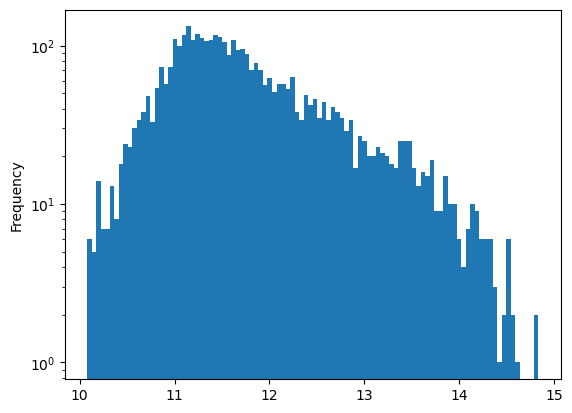

In [114]:
# DataFrame plot method
%matplotlib inline
#import matplotlib.pyplot as plt
block['lmhalo'].plot.hist(bins=100, logy = True)
#plt.show()

#### Generate huge catalog

In [141]:
if False:
    with open(filename, 'r') as galaxy_fd:
        galaxy_sample = pd.read_csv(
            galaxy_fd, 
            sep=',', 
            index_col = unique_gal_id_field, 
            comment='#', 
            na_values = '\\N'
        )

    outfile = resource('galaxy_sample_increased.csv')
    N_CHUNKS = 100
    with open(outfile, 'w+') as f_out:
        for chunk_id in range(N_CHUNKS):
            # In order not to write n chunk times the header (HELP PAU!)
            galaxy_sample.to_csv(f_out, 
                columns = ['ra_gal','dec_gal','z_cgal_v'], 
                index=True, 
                header= chunk_id==0, 
                mode='a'
           )

In [159]:
huge_file = resource('galaxy_sample_increased.csv')
gal_chunk = 1e6
histograms = []
bins_ra = np.arange(0, 360, 3)
bins_dec = np.arange(-90, 90, 1)

hists = np.zeros([len(bins_ra) - 1, len(bins_dec) - 1])
with open(huge_file, 'r') as galaxy_fd:
    galaxy_sample_reader = pd.read_csv(
        galaxy_fd, 
        sep=',', 
        index_col = unique_gal_id_field, 
        comment='#', 
        na_values = '\\N', 
        chunksize=gal_chunk
    )
    for chunk_id, chunk in enumerate(galaxy_sample_reader):
        hist, _, _ = np.histogram2d(chunk['ra_gal'], chunk['dec_gal'],
                              bins=[bins_ra, bins_dec])
        hists += np.array(hist)
#hists = np.array(hists).sum(axis=2)

In [153]:
import matplotlib.pyplot as plt

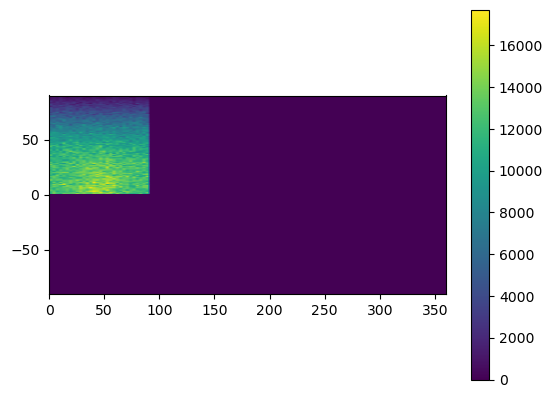

In [162]:
plt.imshow(np.rot90(hists), extent=[0, 360, -90, 90])
plt.colorbar()

<a id=selecting></a>
## Selecting and slicing

- The idea of this section is to show how to slice and get and set subsets of pandas objects

- The basics of indexing are as follows:

| Operation                      | Syntax           | Result        |
|--------------------------------|------------------|---------------|
| Select column                  | df[column label] | Series        |
| Select row by index            | df.loc[index]    | Series        |
| Select row by integer location | df.iloc[pos]     | Series        |
| Slice rows                     | df[5:10]         | DataFrame     |
| Select rows by boolean vector  | df[bool_vec]     | DataFrame     |

In [97]:
%%time
# Same dataframe as before
filename=resource('galaxy_sample.csv.bz2')
galaxy_sample = pd.read_csv(
    filename, 
    sep=',', 
    index_col = unique_gal_id_field, 
    comment='#', 
    na_values = r'\N'
)

CPU times: user 1.97 s, sys: 83.6 ms, total: 2.06 s
Wall time: 2.06 s


In [98]:
galaxy_sample.head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
28581888,6.322946,25.820680,0.30917,0.30894,13.5638,-19.107267,0.8683,20.773734
6686720,32.696644,53.073577,0.17156,0.16844,14.4175,-16.587480,0.8183,21.803620
23693312,17.699937,75.128659,0.72270,0.72423,11.4068,-19.403244,0.5311,22.553554
6115328,61.603497,59.016913,0.21891,0.21605,13.9224,-16.929097,0.1780,22.106301
8955904,32.202269,71.912705,0.29446,0.29086,13.2412,-15.597617,0.1631,24.230383


In [117]:
len(galaxy_sample)

243988

- Select a column

In [99]:
galaxy_sample['ra_gal'].head()

unique_gal_id
28581888     6.322946
6686720     32.696644
23693312    17.699937
6115328     61.603497
8955904     32.202269
Name: ra_gal, dtype: float64

In [100]:
type(galaxy_sample['dec_gal'])

pandas.core.series.Series

In [101]:
galaxy_sample[['ra_gal','dec_gal','lmhalo']].head()

,ra_gal,dec_gal,lmhalo
unique_gal_id,,,
28581888,6.322946,25.820680,13.5638
6686720,32.696644,53.073577,14.4175
23693312,17.699937,75.128659,11.4068
6115328,61.603497,59.016913,13.9224
8955904,32.202269,71.912705,13.2412


### `loc`: Select a row by index

In [102]:
galaxy_sample.loc[28581888]

ra_gal       6.322946
dec_gal     25.820680
z_cgal       0.309170
z_cgal_v     0.308940
lmhalo      13.563800
abs_mag    -19.107267
color        0.868300
app_mag     20.773734
Name: 28581888, dtype: float64

In [122]:
type(galaxy_sample.loc[28581888])

pandas.core.series.Series

### `iloc`: Select a row by integer location

In [104]:
galaxy_sample.iloc[5]

ra_gal      41.511403
dec_gal     78.611159
z_cgal       0.762280
z_cgal_v     0.759450
lmhalo      13.796900
abs_mag    -18.716348
color        0.849900
app_mag     23.537352
Name: 12351488, dtype: float64

In [124]:
type(galaxy_sample.iloc[0])

pandas.core.series.Series

### Slice rows

In [105]:
galaxy_sample.iloc[3:7]

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
6115328,61.603497,59.016913,0.21891,0.21605,13.9224,-16.929097,0.1780,22.106301
8955904,32.202269,71.912705,0.29446,0.29086,13.2412,-15.597617,0.1631,24.230383
12351488,41.511403,78.611159,0.76228,0.75945,13.7969,-18.716348,0.8499,23.537352
15034368,36.454818,1.470759,0.16827,0.16882,12.4438,-16.753474,0.4932,21.759327


In [106]:
galaxy_sample[3:7]

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
6115328,61.603497,59.016913,0.21891,0.21605,13.9224,-16.929097,0.1780,22.106301
8955904,32.202269,71.912705,0.29446,0.29086,13.2412,-15.597617,0.1631,24.230383
12351488,41.511403,78.611159,0.76228,0.75945,13.7969,-18.716348,0.8499,23.537352
15034368,36.454818,1.470759,0.16827,0.16882,12.4438,-16.753474,0.4932,21.759327


In [127]:
type(galaxy_sample.iloc[3:7])

pandas.core.frame.DataFrame

### Select rows by boolean vector

The operators are: `|` for or, `&` for and, and `~` for not. These must be grouped by using parentheses.

In [107]:
# Boolean vector
(galaxy_sample['ra_gal'] < 45).tail()

unique_gal_id
61456384    False
48244736     True
53536768     True
72990720     True
63993856    False
Name: ra_gal, dtype: bool

In [130]:
type(galaxy_sample['ra_gal'] < 45)

pandas.core.series.Series

In [108]:
mask = galaxy_sample['ra_gal'] > 45
galaxy_sample[mask].head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
6115328,61.603497,59.016913,0.21891,0.21605,13.9224,-16.929097,0.1780,22.106301
490539008,50.947777,47.746368,0.52318,0.52377,10.8470,-16.736888,0.5417,24.525811
486078464,82.925868,40.278724,0.43548,0.43453,10.7899,-16.574389,0.4893,24.224212
497823744,60.660616,2.134763,0.44947,0.44761,10.7859,-16.568143,0.3134,24.271558
499359744,58.234774,38.335735,0.54060,0.54120,10.8696,-17.017661,0.5047,24.231038


In [110]:
# redshift shell
galaxy_sample[ 
    (galaxy_sample.z_cgal >= 1.0)].head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
14092288,3.541733,85.717794,1.31216,1.31286,11.5322,-19.982453,0.5755,23.953548
419973120,63.377483,40.053352,1.03406,1.03442,11.2170,-18.864199,0.4036,24.288600
427509760,73.860290,31.617455,1.08460,1.08462,11.3226,-19.281010,0.3823,23.936389
422977536,51.310580,27.446465,1.07574,1.07696,11.2756,-19.107978,0.7103,24.159323
423663616,45.839500,19.802354,1.09587,1.09755,11.2396,-18.975891,0.3189,23.988708


In [111]:
# redshift shell
galaxy_sample[
    (galaxy_sample.z_cgal >= 0.2) &
    (galaxy_sample.z_cgal <= 1.0)].head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
28581888,6.322946,25.820680,0.30917,0.30894,13.5638,-19.107267,0.8683,20.773734
23693312,17.699937,75.128659,0.72270,0.72423,11.4068,-19.403244,0.5311,22.553554
6115328,61.603497,59.016913,0.21891,0.21605,13.9224,-16.929097,0.1780,22.106301
8955904,32.202269,71.912705,0.29446,0.29086,13.2412,-15.597617,0.1631,24.230383
12351488,41.511403,78.611159,0.76228,0.75945,13.7969,-18.716348,0.8499,23.537352


In [112]:
galaxy_sample[(galaxy_sample.z_cgal <= 1.0) 
              & (galaxy_sample.index.isin([6686720,13615360,3231232]))]

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
6686720,32.696644,53.073577,0.17156,0.16844,14.4175,-16.58748,0.8183,21.80362


In [113]:
galaxy_sample[(galaxy_sample['ra_gal'] < 1.) 
              & (galaxy_sample['dec_gal'] < 1.)
             ][['ra_gal','dec_gal']].head()

,ra_gal,dec_gal
unique_gal_id,,
60252160,0.506340,0.603683
325529600,0.511039,0.443529
443926528,0.322707,0.102679
60200960,0.944569,0.540849
445370368,0.774362,0.125568


### Recap
- loc works on labels in the index.
- iloc works on the positions in the index (so it only takes integers).

## Manipulating the data

### Advanced example: estimate the size of the disk (*disk_length*) for a set of galaxies

- In this exercise we are going to use some of the previous examples. 
- Also we are going to introduce how to add a column and some other concepts

    - We split the galaxies into two different populations, Ellipticals and Spirals, depending on the their color and absolute magnitude:
        ```
         if color - 0.29 + 0.03 * abs_mag < 0 then Spiral
         else then Elliptical
        ```

    - How many galaxies are elliptical or spirals?

    - Elliptical galaxies do not have any disk (and therefore disk_length = 0).

    - The disk_length for spiral galaxies follows a normal distribution with mean = 0 and sigma = 0.15 (in arcsec). In addition, the minimum disk_length for a spiral galaxy is 1.e-3.

In [114]:
galaxy_sample.tail(10)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
65386496,66.370770,48.483216,0.23369,0.23318,13.0960,-16.209401,0.8161,22.876399
35108864,15.013475,0.029625,0.34678,0.34580,11.8156,-20.119203,0.7126,20.080397
65302528,56.558624,36.787993,0.24120,0.24362,12.4450,-16.964598,0.3157,22.367401
37863424,9.710972,34.448477,0.46939,0.46876,12.2258,-20.530049,0.7172,20.485350
75610112,43.292052,41.488275,0.28673,0.28792,13.6292,-15.888523,0.3105,23.902177
61456384,86.538290,14.352161,0.14028,0.14349,13.8817,-14.451195,0.7766,23.483205
48244736,10.330761,15.381618,0.64717,0.64651,11.6325,-19.978228,0.6734,21.861671
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619


In [137]:
len(galaxy_sample)

243988

In [115]:
# Splitting the galaxies
# Boolean mask
has_disk_mask = (galaxy_sample['color']-0.29+0.03*galaxy_sample['abs_mag'] < 0)

In [116]:
has_disk_mask.tail(10)

unique_gal_id
65386496    False
35108864     True
65302528     True
37863424     True
75610112     True
61456384    False
48244736     True
53536768     True
72990720     True
63993856     True
dtype: bool

In [117]:
print (len(has_disk_mask))
print (type(has_disk_mask))

243988
<class 'pandas.core.series.Series'>


In [119]:
# Counting how many spirals
n_spiral = has_disk_mask.sum()
n_spiral

208006

In [120]:
# Counting how many ellipticals
n_elliptical = (~has_disk_mask).sum()
n_elliptical

35982

In [143]:
galaxy_sample[has_disk_mask].count()

ra_gal      208006
dec_gal     208006
z_cgal      208006
z_cgal_v    208006
lmhalo      208006
abs_mag     208006
color       208006
app_mag     208006
dtype: int64

In [121]:
galaxy_sample['new_column'] = 0.4

In [122]:
galaxy_sample.head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag,new_column
unique_gal_id,,,,,,,,,
28581888,6.322946,25.820680,0.30917,0.30894,13.5638,-19.107267,0.8683,20.773734,0.4
6686720,32.696644,53.073577,0.17156,0.16844,14.4175,-16.587480,0.8183,21.803620,0.4
23693312,17.699937,75.128659,0.72270,0.72423,11.4068,-19.403244,0.5311,22.553554,0.4
6115328,61.603497,59.016913,0.21891,0.21605,13.9224,-16.929097,0.1780,22.106301,0.4
8955904,32.202269,71.912705,0.29446,0.29086,13.2412,-15.597617,0.1631,24.230383,0.4


In [123]:
galaxy_sample[has_disk_mask]['hubble_type'] = 'Spiral'

/tmp/ipykernel_73/4283482928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galaxy_sample[has_disk_mask]['hubble_type'] = 'Spiral'


In [124]:
# It did not add any column! It was working in a view!
galaxy_sample.tail(5)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag,new_column
unique_gal_id,,,,,,,,,
61456384,86.538290,14.352161,0.14028,0.14349,13.8817,-14.451195,0.7766,23.483205,0.4
48244736,10.330761,15.381618,0.64717,0.64651,11.6325,-19.978228,0.6734,21.861671,0.4
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597,0.4
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619,0.4
63993856,68.025492,34.740194,0.20558,0.20466,13.8767,-14.264275,0.3934,24.659826,0.4


In [125]:
# This is the proper way of doing it if one wants to add another column
galaxy_sample.loc[has_disk_mask, 'hubble_type'] = 'Spiral'

In [126]:
galaxy_sample.loc[~has_disk_mask, 'hubble_type'] = 'Elliptical'

In [127]:
galaxy_sample.tail(5)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag,new_column,hubble_type
unique_gal_id,,,,,,,,,,
61456384,86.538290,14.352161,0.14028,0.14349,13.8817,-14.451195,0.7766,23.483205,0.4,Elliptical
48244736,10.330761,15.381618,0.64717,0.64651,11.6325,-19.978228,0.6734,21.861671,0.4,Spiral
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597,0.4,Spiral
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619,0.4,Spiral
63993856,68.025492,34.740194,0.20558,0.20466,13.8767,-14.264275,0.3934,24.659826,0.4,Spiral


In [152]:
galaxy_sample['hubble_type'].values.dtype

dtype('O')

In [128]:
# We can use the numpy where method to do the same:
galaxy_sample['color_type'] = np.where(has_disk_mask, 'Blue', 'Red')

In [129]:
galaxy_sample.tail(5)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag,new_column,hubble_type,color_type
unique_gal_id,,,,,,,,,,,
61456384,86.538290,14.352161,0.14028,0.14349,13.8817,-14.451195,0.7766,23.483205,0.4,Elliptical,Red
48244736,10.330761,15.381618,0.64717,0.64651,11.6325,-19.978228,0.6734,21.861671,0.4,Spiral,Blue
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597,0.4,Spiral,Blue
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619,0.4,Spiral,Blue
63993856,68.025492,34.740194,0.20558,0.20466,13.8767,-14.264275,0.3934,24.659826,0.4,Spiral,Blue


In [130]:
# The proper way would be to use a boolean field
galaxy_sample['has_disk'] = has_disk_mask

In [131]:
galaxy_sample.tail(5)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag,new_column,hubble_type,color_type,has_disk
unique_gal_id,,,,,,,,,,,,
61456384,86.538290,14.352161,0.14028,0.14349,13.8817,-14.451195,0.7766,23.483205,0.4,Elliptical,Red,False
48244736,10.330761,15.381618,0.64717,0.64651,11.6325,-19.978228,0.6734,21.861671,0.4,Spiral,Blue,True
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597,0.4,Spiral,Blue,True
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619,0.4,Spiral,Blue,True
63993856,68.025492,34.740194,0.20558,0.20466,13.8767,-14.264275,0.3934,24.659826,0.4,Spiral,Blue,True


In [132]:
galaxy_sample.loc[~has_disk_mask, 'disk_length'] = 0.

In [133]:
galaxy_sample.loc[has_disk_mask, 'disk_length'] = np.fabs(
                np.random.normal(
                    0., scale=0.15, size=n_spiral
                )
            )

In [134]:
galaxy_sample['disk_length'].values

array([0.        , 0.        , 0.06872239, ..., 0.06223494, 0.19781131,
       0.07169295])

<p style="font-size:32px;color:red">DO NOT LOOP THE PANDAS DATAFRAME!</p> in general ...

In [160]:
galaxy_sample.tail(5)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag,new_column,hubble_type,color_type,has_disk,disk_length
unique_gal_id,,,,,,,,,,,,,
61456384,86.538290,14.352161,0.14028,0.14349,13.8817,-14.451195,0.7766,23.483205,0.4,Elliptical,Red,False,0.000000
48244736,10.330761,15.381618,0.64717,0.64651,11.6325,-19.978228,0.6734,21.861671,0.4,Spiral,Blue,True,0.011508
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597,0.4,Spiral,Blue,True,0.058871
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619,0.4,Spiral,Blue,True,0.385927
63993856,68.025492,34.740194,0.20558,0.20466,13.8767,-14.264275,0.3934,24.659826,0.4,Spiral,Blue,True,0.163509


In [161]:
# Minimum value for disk_length for spirals
dl_min = 1.e-4;

In [162]:
disk_too_small_mask = has_disk_mask & (galaxy_sample['disk_length'] < dl_min)

In [163]:
disk_too_small_mask.sum()

89

In [164]:
galaxy_sample.loc[disk_too_small_mask, 'disk_length'].head()

unique_gal_id
347488256    0.000060
307681280    0.000022
249544704    0.000012
62222336     0.000093
28030976     0.000074
Name: disk_length, dtype: float64

In [165]:
galaxy_sample.loc[disk_too_small_mask, 'disk_length'] = dl_min

In [166]:
galaxy_sample.loc[disk_too_small_mask, 'disk_length'].head()

unique_gal_id
347488256    0.0001
307681280    0.0001
249544704    0.0001
62222336     0.0001
28030976     0.0001
Name: disk_length, dtype: float64

In [167]:
galaxy_sample.tail(5)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag,new_column,hubble_type,color_type,has_disk,disk_length
unique_gal_id,,,,,,,,,,,,,
61456384,86.538290,14.352161,0.14028,0.14349,13.8817,-14.451195,0.7766,23.483205,0.4,Elliptical,Red,False,0.000000
48244736,10.330761,15.381618,0.64717,0.64651,11.6325,-19.978228,0.6734,21.861671,0.4,Spiral,Blue,True,0.011508
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597,0.4,Spiral,Blue,True,0.058871
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619,0.4,Spiral,Blue,True,0.385927
63993856,68.025492,34.740194,0.20558,0.20466,13.8767,-14.264275,0.3934,24.659826,0.4,Spiral,Blue,True,0.163509


In [168]:
len(galaxy_sample)

243988

<a id=exercise2></a>
### Exercise 2: Estimate another galaxy property

- What is the mean value and the standard deviation of the *disk_length* for spiral galaxies (Tip: use the .mean() and .std() methods)

- Estimate the bulge_length for elliptical galaxies. The bulge_length depends on the apparent magnitude in the following way:
    
    bulge_length = exp(-1.145 - 0.269 * (app_mag - 23.))
    
- How many galaxies have bulge_lenth > 1.0?  

- In our model the maximum bulge_length for an elliptical galaxy is 0.5 arcsec.

- What is the mean value and the standard deviation of the *bulge_length* for elliptical galaxies. And for ellipticals with absolute magnitude brighter than -20?

0.12002248664034579 0.0907789515850079


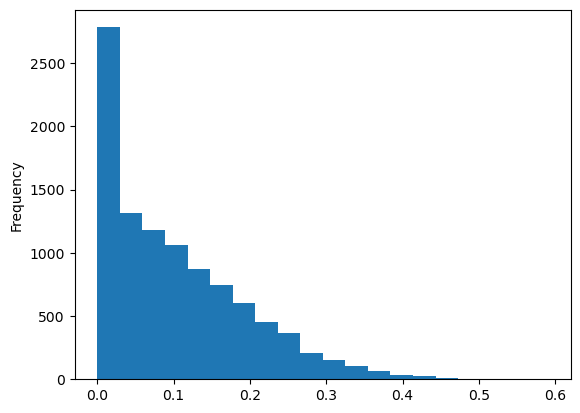

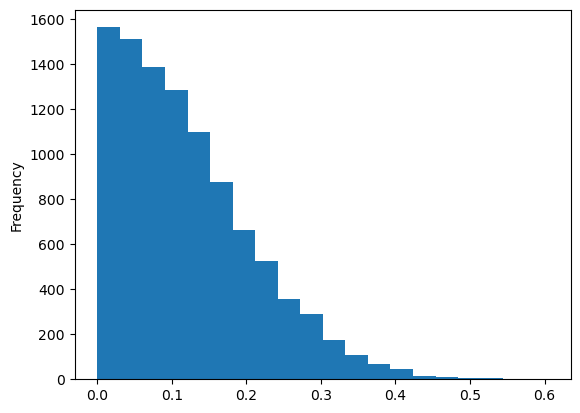

0.35981719316877214 0.1519527928312501


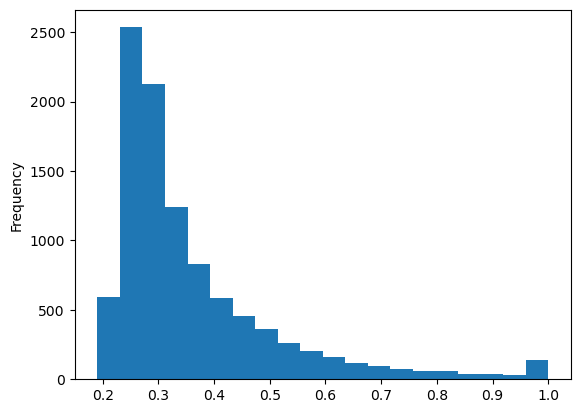

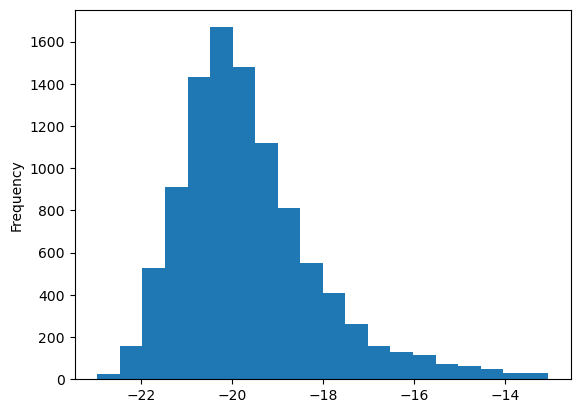

0.4270710997596488 0.18090971673039885


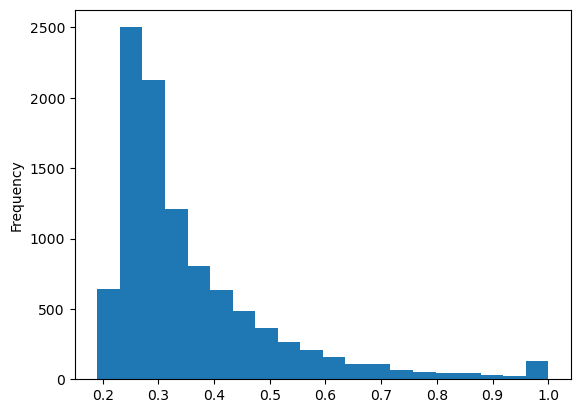

In [171]:
# %load -r 20-102 solutions/solution_pandas.py

<a id=merging></a>
## Merge, join, and concatenate

<https://pandas.pydata.org/pandas-docs/stable/merging.html>

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### `concat`: object concatenation

```
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

In [172]:
df1 = pd.DataFrame(
    {'A': ['A0', 'A1', 'A2', 'A3'],
     'B': ['B0', 'B1', 'B2', 'B3'],
     'C': ['C0', 'C1', 'C2', 'C3'],
     'D': ['D0', 'D1', 'D2', 'D3']},
    index=[0, 1, 2, 3]
)

In [173]:
df2 = pd.DataFrame(
    {'A': ['A4', 'A5', 'A6', 'A7'],
     'B': ['B4', 'B5', 'B6', 'B7'],
     'C': ['C4', 'C5', 'C6', 'C7'],
     'D': ['D4', 'D5', 'D6', 'D7']},
    index=[4, 5, 6, 7]
) 

In [174]:
df3 = pd.DataFrame(
    {'A': ['A8', 'A9', 'A10'],
     'B': ['B8', 'B9', 'B10'],
     'C': ['C8', 'C9', 'C10']},
    index=[8, 9, 10]
)

In [175]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [176]:
df3

,A,B,C
8,A8,B8,C8
9,A9,B9,C9
10,A10,B10,C10


In [177]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [178]:
frames = [df1, df2, df3]

In [179]:
frames

[    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     A   B   C   D
 4  A4  B4  C4  D4
 5  A5  B5  C5  D5
 6  A6  B6  C6  D6
 7  A7  B7  C7  D7,
       A    B    C
 8    A8   B8   C8
 9    A9   B9   C9
 10  A10  B10  C10]

In [180]:
type(frames)

list

In [181]:
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,NaN
9,A9,B9,C9,NaN


In [182]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,NaN
9,A9,B9,C9,NaN


In [183]:
# Multiindex
result = pd.concat(frames, keys=['x', 'y','z'])

In [184]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8  NaN
  9    A9   B9   C9  NaN
  10  A10  B10  C10  NaN

In [185]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10)],
           )

In [189]:
result.loc['y']

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [190]:
result.loc[['x', 'y']]

A   B   C   D
x 0  A0  B0  C0  D0
  1  A1  B1  C1  D1
  2  A2  B2  C2  D2
  3  A3  B3  C3  D3
y 4  A4  B4  C4  D4
  5  A5  B5  C5  D5
  6  A6  B6  C6  D6
  7  A7  B7  C7  D7

In [193]:
result.loc['y', 4]

A    A4
B    B4
C    C4
D    D4
Name: (y, 4), dtype: object

In [194]:
# I changed the columns!
df4 = pd.DataFrame(
    {'B': ['B2', 'B3', 'B6', 'B7'],
     'D': ['D2', 'D3', 'D6', 'D7'],
     'F': ['F2', 'F3', 'F6', 'F7']},
    index=[2, 3, 6, 7]
)

In [195]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [196]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [197]:
result = pd.concat([df1, df4], sort=False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [198]:
result = pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [199]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [203]:
result = pd.concat([df1,df4], sort=False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


ignore the index, i.e. generate a new one

In [204]:
result = pd.concat([df1,df4], sort=False, ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


- Mixing dimensions

In [205]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [206]:
s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')
s1

0    X0
1    X1
2    X2
3    X3
Name: X, dtype: object

In [207]:
result = pd.concat([s1,df1])
result

,0,A,B,C,D
0,X0,NaN,NaN,NaN,NaN
1,X1,NaN,NaN,NaN,NaN
2,X2,NaN,NaN,NaN,NaN
3,X3,NaN,NaN,NaN,NaN
0,NaN,A0,B0,C0,D0
1,NaN,A1,B1,C1,D1
2,NaN,A2,B2,C2,D2
3,NaN,A3,B3,C3,D3


In [208]:
result = pd.concat([df1,s1], axis = 1)
result

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


In [209]:
s2 = pd.Series(['_0', '_1', '_2', '_3'])

In [210]:
result = pd.concat([df1,s2,s2,s2], axis = 1)
result

,A,B,C,D,0,1,2
0,A0,B0,C0,D0,_0,_0,_0
1,A1,B1,C1,D1,_1,_1,_1
2,A2,B2,C2,D2,_2,_2,_2
3,A3,B3,C3,D3,_3,_3,_3


<a id=exercise3></a>
### Exercise 3: Generate a random catalog using concat method

- In this exercise we will use the concat method and show a basic example of multiIndex.

- Given a subset of a few galaxies with the following properties ['halo_id', 'gal_id' ,'ra', 'dec', 'z', 'abs_mag'], create a random catalog with 50 times more galaxies than the subset keeping the properties of the galaxies but placing them randomly in the first octant of the sky. 

- The index of each galaxy is given by the tuple [halo_id, gal_id]

In [211]:
data =  [
    # halo_id, gal_id, ra, dec, z, abs_mag'
    [1, 1, 21.5, 30.1, 0.21, -21.2],
    [1, 2, 21.6, 29.0, 0.21, -18.3],
    [1, 3, 21.4, 30.0, 0.21, -18.5],
    [2, 1, 45.0, 45.0, 0.42, -20.4],
    [3, 1, 25.0, 33.1, 0.61, -21.2],
    [3, 2, 25.1, 33.2, 0.61, -20.3]
]

In [214]:
# %load -r 103-145 solutions/solution_pandas.py

,halo_id,gal_id,ra,dec,z,abs_mag
random_index,,,,,,
0,1,1,35.397778,36.625924,0.21,-21.2
1,1,2,41.186113,0.673995,0.21,-18.3
2,1,3,29.549109,7.083430,0.21,-18.5
3,2,1,69.235191,13.758491,0.42,-20.4
4,3,1,80.096065,16.545938,0.61,-21.2
5,3,2,18.140767,6.989050,0.61,-20.3
6,1,1,5.166893,37.533136,0.21,-21.2
7,1,2,12.613028,36.047330,0.21,-18.3
8,1,3,36.944143,13.404809,0.21,-18.5


### `merge` : Database-style DataFrame joining/merging:

- pandas has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like SQL. These methods perform significantly better (in some cases well over an order of magnitude better) than other open source implementations (like base::merge.data.frame in R). The reason for this is careful algorithmic design and internal layout of the data in DataFrame

- See the [cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html) for some advanced strategies

- Users who are familiar with SQL but new to pandas might be interested in a [comparison with SQL](https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html#compare-with-sql-join)

```
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
```

### Example: Merging dataframes using the merge method (thanks Nadia!)

- Goal: build a dataframe merging 2 different dataframes with complementary information, through the relation given by a third dataframe.

    - df_stars contains information of stars magnitudes per sdss_star_id and per *filter*:
        - ['sdss_star_id', 'filter', 'expected_mag', 'expected_mag_err']
        - Note, the file is "somehow" corrupted and entries are duplicate several times
        - Unique entries are characterized by *sdss_star_id* and *filter*
    - df_spectra contains information of star *flux* per *band* (== *filter*) and per *spec_id* (!= *sdss_star_id*):
        - ['spec_id', 'band', 'flux', 'flux_err']
        - Unique entries are characterized by *spec_id* and *band*
    - df_spec_IDs allows to make the correspondence between *sdss_star_id* (== *objID*) and *spec_id* (== *specObjID*):
        - ['objID', 'specObjID']
        - Unique entries are characterized by *objID*

In [216]:
star_filename = resource('df_star.ssv')
spectra_filename = resource('df_spectra.ssv')
starid_specid_filename = resource('df_starid_specid.ssv')

In [217]:
df_spectra = pd.read_csv(spectra_filename, index_col=['spec_id', 'band'], sep = ' ')
df_spectra.head(41)

flux  flux_err
spec_id            band                    
564125093970601984 NB575  118.439   5.82869
                   NB455  139.590   4.68904
                   NB555  131.690   5.15743
                   NB475  117.701   4.35988
                   NB795  153.804  10.49200
                   NB535  115.215   4.52892
                   NB725  166.609   6.41391
                   NB765  148.803   8.70154
                   NB815  159.590   9.24626
                   NB485  112.973   4.42662
                   NB685  193.392   5.02416
                   NB705  154.606   5.02007
                   NB835  193.390  13.89030
                   NB645  133.584   4.41329
                   NB585  123.810   6.51806
                   NB505  124.124   4.26728
                   NB695  159.519   5.38121
                   NB625  142.537   5.04128
                   NB745  140.507   6.48958
                   NB605  130.867   5.19826
                   NB565  130.628   5.44442
                   NB465  146.835   4.58899
                   NB545  111.936   4.69258
                   NB525  110.591   4.36454
                   NB665  151.969   4.31910
                   NB785  166.931  10.25410
                   NB805  153.564   9.49142
                   NB615  137.293   4.74815
                   NB635  133.074   4.73063
                   NB715  166.483   5.05375
                   NB825  160.063  10.96990
                   NB495  112.334   4.30512
                   NB595  122.645   5.97710
                   NB675  200.884   4.21519
                   NB845  191.830  14.44110
                   NB655  140.002   4.60485
                   NB515  110.836   4.26808
                   NB755  140.380   7.14257
                   NB735  156.592   7.43371
                   NB775  164.835   8.71259
564125643726415872 NB575  376.499   6.55297

In [218]:
df_starid_specid = pd.read_csv(starid_specid_filename, sep=' ')
df_starid_specid.head(5)

,objID,specObjID
0,1237653664722386988,564125918604322816
1,1237648722828460042,564133065429903360
2,1237651752923758623,564134714697345024
3,1237651752923758661,564134989575251968
4,1237653664722190405,564137188598507520


In [219]:
# Given that the file is somehow corrupted we open it without defining any index
df_star = pd.read_csv(star_filename, sep=' ')
df_star.head(10)

,sdss_star_id,filter,expected_mag,expected_mag_err
0,1237653665258930303,NB455,14.1185,0.002498
1,1237651754534174862,NB455,16.0077,0.009613
2,1237651754534174868,NB455,16.4402,0.018096
3,1237653665258995739,NB455,18.0902,0.026920
4,1237653665258995741,NB455,18.1403,0.033415
5,1237653665258995735,NB455,16.5273,0.019411
6,1237651754534174879,NB455,16.2990,0.021418
7,1237651754534175046,NB455,18.5312,0.018517
8,1237653665258995740,NB455,18.1420,0.013531
9,1237653665258995737,NB455,18.7606,0.018422


In [220]:
df_star[(df_star['sdss_star_id'] == 1237653665258930303) & (df_star['filter'] == 'NB455')]

,sdss_star_id,filter,expected_mag,expected_mag_err
0,1237653665258930303,NB455,14.1185,0.002498
14135,1237653665258930303,NB455,14.1185,0.002498
41578,1237653665258930303,NB455,14.1185,0.002498
69366,1237653665258930303,NB455,14.1185,0.002498
76098,1237653665258930303,NB455,14.1185,0.002498
92857,1237653665258930303,NB455,14.1185,0.002498
94740,1237653665258930303,NB455,14.1185,0.002498
102129,1237653665258930303,NB455,14.1185,0.002498


In [221]:
# Drop duplicates:
df_star.drop_duplicates(subset = ['sdss_star_id', 'filter'], inplace= True)

In [222]:
df_star[(df_star['sdss_star_id'] == 1237653665258930303) & (df_star['filter'] == 'NB455')]

,sdss_star_id,filter,expected_mag,expected_mag_err
0,1237653665258930303,NB455,14.1185,0.002498


In [223]:
df_starid_specid.head(5)

,objID,specObjID
0,1237653664722386988,564125918604322816
1,1237648722828460042,564133065429903360
2,1237651752923758623,564134714697345024
3,1237651752923758661,564134989575251968
4,1237653664722190405,564137188598507520


- We are going to unset the index and rename the columns in order to use the "on" argument:

In [224]:
df_spectra.reset_index(inplace = True)
df_spectra.head()

,spec_id,band,flux,flux_err
0,564125093970601984,NB575,118.439,5.82869
1,564125093970601984,NB455,139.590,4.68904
2,564125093970601984,NB555,131.690,5.15743
3,564125093970601984,NB475,117.701,4.35988
4,564125093970601984,NB795,153.804,10.49200


In [225]:
df_spectra.rename(columns={'band': 'filter'}, inplace = True)
df_spectra.head()

,spec_id,filter,flux,flux_err
0,564125093970601984,NB575,118.439,5.82869
1,564125093970601984,NB455,139.590,4.68904
2,564125093970601984,NB555,131.690,5.15743
3,564125093970601984,NB475,117.701,4.35988
4,564125093970601984,NB795,153.804,10.49200


In [226]:
df_starid_specid.rename(columns={'objID':'sdss_star_id', 'specObjID':'spec_id'}, inplace = True)
df_starid_specid.head()

,sdss_star_id,spec_id
0,1237653664722386988,564125918604322816
1,1237648722828460042,564133065429903360
2,1237651752923758623,564134714697345024
3,1237651752923758661,564134989575251968
4,1237653664722190405,564137188598507520


- Now we have everything ready to make the JOINs

In [227]:
df_star_merged = pd.merge(df_star, df_starid_specid, on='sdss_star_id')

In [228]:
df_star_merged.head()

,sdss_star_id,filter,expected_mag,expected_mag_err,spec_id
0,1237653665259061426,NB455,17.0845,0.008731,563122610200668160
1,1237653665259061426,NB475,16.9845,0.008731,563122610200668160
2,1237653665259061426,NB535,16.7995,0.008731,563122610200668160
3,1237653665259061426,NB685,16.5315,0.008731,563122610200668160
4,1237653665259061426,NB655,16.5745,0.008731,563122610200668160


In [229]:
df_star_merged = pd.merge(df_star_merged, df_spectra, on=['spec_id','filter'])

In [230]:
df_star_merged.head(40)

,sdss_star_id,filter,expected_mag,expected_mag_err,spec_id,flux,flux_err
0,1237653665259061426,NB455,17.0845,0.008731,563122610200668160,3449.55,14.09800
1,1237653665259061426,NB475,16.9845,0.008731,563122610200668160,3787.50,14.22110
2,1237653665259061426,NB535,16.7995,0.008731,563122610200668160,4294.29,15.15040
3,1237653665259061426,NB685,16.5315,0.008731,563122610200668160,5159.24,16.80340
4,1237653665259061426,NB655,16.5745,0.008731,563122610200668160,4901.12,15.64510
5,1237653665259061426,NB765,16.4835,0.008731,563122610200668160,5256.04,22.53470
6,1237653665259061426,NB845,16.4475,0.008731,563122610200668160,5224.63,27.16950
7,1237653665259061426,NB545,16.7635,0.008731,563122610200668160,4381.42,15.48150
8,1237653665259061426,NB745,16.4945,0.008731,563122610200668160,5204.17,18.33640
9,1237653665259061426,NB565,16.7105,0.008731,563122610200668160,4548.09,16.60220


In [231]:
df_star_merged.set_index(['sdss_star_id', 'filter'], inplace = True)

In [232]:
df_star_merged.head()

expected_mag  expected_mag_err  \
sdss_star_id        filter                                   
1237653665259061426 NB455        17.0845          0.008731   
                    NB475        16.9845          0.008731   
                    NB535        16.7995          0.008731   
                    NB685        16.5315          0.008731   
                    NB655        16.5745          0.008731   

                                       spec_id     flux  flux_err  
sdss_star_id        filter                                         
1237653665259061426 NB455   563122610200668160  3449.55   14.0980  
                    NB475   563122610200668160  3787.50   14.2211  
                    NB535   563122610200668160  4294.29   15.1504  
                    NB685   563122610200668160  5159.24   16.8034  
                    NB655   563122610200668160  4901.12   15.6451

In [233]:
# Each element has been observed in how many bands?
count_bands = df_star_merged.groupby(level=0).count()

In [234]:
count_bands.head(20)

,expected_mag,expected_mag_err,spec_id,flux,flux_err
sdss_star_id,,,,,
1237648722827870212,5,5,5,5,5
1237648722827870237,5,5,5,5,5
1237648722827870367,5,5,5,5,5
1237648722827870374,3,3,3,3,3
1237648722827935750,5,5,5,5,5
1237648722827935861,5,5,5,5,5
1237648722827935902,5,5,5,5,5
1237648722827935914,4,4,4,4,4
1237648722827935919,5,5,5,5,5


In [235]:
df_star_merged.groupby(level=1)['flux_err'].mean().head(10)

filter
NB455    7.725166
NB465    7.935421
NB475    7.720782
NB485    7.795951
NB495    7.964259
NB505    8.040383
NB515    8.438551
NB525    8.940733
NB535    8.088588
NB545    8.619306
Name: flux_err, dtype: float64

<a id=functions></a>
## More functionalities
- Looping a dataframe (iterrows):

<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html>

- sort method:

<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html>

- sample method:

<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html>

- Reshape dataframes (pivot, stack, unstack):

<http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/>

- Data cleaning:
    
    - check for missing values (isnull): <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html>
    - drop missing values (dropna): <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html>
    - fill the missing values with other values (fillna): <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html>
    - replace values with different values (replace): <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html>

- Working with text data: the `str` attribute
    - https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html
- Working with dates
    - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

## Some general ideas to get home:

- Do not loop a dataframe!

- Try to work by chunks; create functions that work with chunks

- Work with standard formats and "already implemented" functions

<a id=caveats></a>
### Caveats and technicalities

### [Floating point limitations](<https://docs.python.org/2/tutorial/floatingpoint.html>):

- Be careful with exact comparisons!

In [236]:
# e.g.: the decimal value 0.1 cannot be represented exactly as a base 2 fraction
(0.1 + 0.2) == 0.3

False

In [237]:
(0.1 + 0.2) - 0.3

5.551115123125783e-17

### FITS files

- [fitsio](<https://pypi.python.org/pypi/fitsio/>)

- And working by chunks

In [239]:
import fitsio

In [240]:
filename = resource('galaxy_sample.fits')

In [242]:
fits = fitsio.FITS(filename)

In [243]:
data = fits[1]

In [244]:
# Number of rows
data.get_nrows()

243988

In [245]:
# chunk size
gal_chunk = 300000

In [246]:
# e.g.to create the ranges!
import math
niter = int(math.ceil(data.get_nrows() / float(gal_chunk)))

for i in range(niter):
    s = i*gal_chunk
    f = min((i+1)*gal_chunk, data.get_nrows())
    chunk = data[s:f]
    print (i)
    print (type(chunk))
    print (chunk.dtype)
    df_chunk = pd.DataFrame(chunk)
    print (type(df_chunk))
    print (df_chunk.dtypes)
    df_chunk = df_chunk.set_index('unique_gal_id')
    print (df_chunk.head())

0
<class 'numpy.ndarray'>
[('unique_gal_id', '>i8'), ('ra_gal', '>f8'), ('dec_gal', '>f8'), ('z_cgal', '>f8'), ('z_cgal_v', '>f8'), ('lmhalo', '>f4'), ('abs_mag', '>f8'), ('color', '>f4'), ('app_mag', '>f8')]
<class 'pandas.core.frame.DataFrame'>
unique_gal_id        >i8
ra_gal           float64
dec_gal          float64
z_cgal           float64
z_cgal_v         float64
lmhalo           float32
abs_mag          float64
color            float32
app_mag          float64
dtype: object
                  ra_gal    dec_gal   z_cgal  z_cgal_v   lmhalo    abs_mag  \
unique_gal_id                                                                
28581888        6.322946  25.820680  0.30917   0.30894  13.5638 -19.107267   
6686720        32.696644  53.073577  0.17156   0.16844  14.4175 -16.587480   
23693312       17.699937  75.128659  0.72270   0.72423  11.4068 -19.403244   
6115328        61.603497  59.016913  0.21891   0.21605  13.9224 -16.929097   
8955904        32.202269  71.912705  0.29446  

### [.values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html) DataFrame attribute 

- Some scipy functions do not allow to use pandas dataframe as arguments and therefore it is useful to use the values atribute, which is the numpy representation of NDFrame

- The dtype will be a lower-common-denominator dtype (implicit upcasting); that is to say if the dtypes (even of numeric types) are mixed, the one that accommodates all will be chosen. Use this with care if you are not dealing with the blocks.

### View vs. Copy

<https://pandas.pydata.org/pandas-docs/stable/indexing.html#returning-a-view-versus-a-copy>

### Wrong input example:
- .dat

- Look at the file using e.g. *head* bash command

- Note that there are more than one space, and if you do *tail filename*, different number of "spaces"

In [247]:
bad_filename = resource('steps.flagship.dat')

In [248]:
df_bad = pd.read_csv(bad_filename)
df_bad.head()

,400 0.000000000000E+00 3.788230419159E+00 1.894401788712E+00 9.993683695793E-01 6.319999811240E-04
0,399 3.788230419159E+00 1.137576389313E+01 ...
1,398 1.137576389313E+01 1.898096656799E+01 ...
2,397 1.898096656799E+01 2.660372543335E+01 ...
3,396 2.660372543335E+01 3.424393081665E+01 ...
4,395 3.424393081665E+01 4.190146636963E+01 ...


In [249]:
df_bad =  pd.read_csv(bad_filename, sep = ' ')

ParserError: Error tokenizing data. C error: Expected 12 fields in line 302, saw 13


- Necessary to "modify" the file in order to convert it into a standard csv file, e.g.:

```
cat steps.flagship.dat | tr -s " " | sed 's/^ *//g' > steps.flagship.ssv
```

In [250]:
good_filename = resource('steps.flagship.ssv')

In [251]:
! cat $bad_filename | tr -s " " | sed 's/^ *//g' > $good_filename

In [252]:
columns = ['step_num', 'r_min', 'r_max', 'r_med', 'a_med', 'z_med']

In [253]:
df = pd.read_csv(good_filename, sep = ' ', header = None, names = columns, index_col = 'step_num')

In [254]:
df.head()

,r_min,r_max,r_med,a_med,z_med
step_num,,,,,
400,0.000000,3.788230,1.894402,0.999368,0.000632
399,3.788230,11.375764,7.583150,0.997475,0.002531
398,11.375764,18.980967,15.179528,0.994956,0.005069
397,18.980967,26.603725,22.793518,0.992441,0.007617
396,26.603725,34.243931,30.425011,0.989929,0.010173
